<a href="https://colab.research.google.com/github/JatoJay/Hamoye-Data-Science-Internship/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML WORKS/energydata_complete - energydata_complete.csv", encoding='latin-1')

df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


# Q.12: 
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

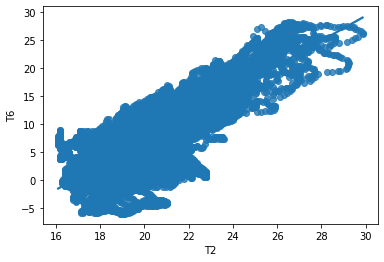

In [ ]:
sns.regplot(x="T2", y="T6",
data=df)

In [ ]:
x= df['T2']
y= df['T6']

In [ ]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset

linear_model.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))


#obtain predictions
predicted_values = linear_model.predict(x_test.values.reshape(-1,1))

# R2--Is a regression model performance measurement technique that indicates how well the regression  predictions approximates the real data. 1 indicates perfect prediction outcome
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)


0.64

# Q.13-16: 

Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?


In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# We normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features_df = df.drop(["date", "lights", 'Appliances'], axis=1)
normalised_df = pd.DataFrame(scaler.fit_transform(features_df), columns=features_df.columns)
target = df['Appliances'] 


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

In [ ]:
# We run a multiplelinear regression using the training set and evaluate our model on the test set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#fit the model to the training dataset
regressor.fit(x_train, y_train)


#obtain predictions
predicted_values = regressor.predict(x_test)

#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
print('MAE', round(mae, 2))

#RSS
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
print('RSS:', round(rss, 3))

#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print('RMSE:',round(rmse, 3))

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
print('R2:',round(r2_score, 3))

MAE 53.64
RSS: 51919454.858
RMSE: 93.641
R2: 0.149


## Q: 17
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [ ]:
# Function to get the weight of the linear model
def get_weight_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weight = get_weight_df(regressor, x_train, 'Linear_Model_Weight')

pd.DataFrame(linear_model_weight)

,Features,Linear_Model_Weight
0,T9,-21.152541
1,T2,-18.371610
2,RH_2,-13.739669
3,T_out,-11.077375
4,RH_8,-5.778479
5,RH_9,-1.763041
6,RH_7,-1.693021
7,T5,-1.599649
8,RH_out,-1.094617
9,T1,-0.366268


In [ ]:
# Min weight

linear_model_weight['Features'].min()

'Press_mm_hg'

In [ ]:
# Max weight
linear_model_weight['Features'].max()

'rv2'

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

# obtain predictions
predicted_values = ridge_reg.predict(x_test)


from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print('RMSE:',round(rmse, 3))

RMSE: 93.641


In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# obtain predictions
lasso_predicted_values = lasso_reg.predict(x_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.077e+06, tolerance: 1.464e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
get_weight_df(lasso_reg, x_train, 'Lasso_Model_Weight')

,Features,Lasso_Model_Weight
0,T9,-2.114245e+01
1,T2,-1.836476e+01
2,RH_2,-1.373616e+01
3,T_out,-1.106335e+01
4,RH_8,-5.778594e+00
5,RH_9,-1.762698e+00
6,RH_7,-1.692170e+00
7,T5,-1.600414e+00
8,RH_out,-1.092288e+00
9,T1,-3.620599e-01


In [ ]:
# Extract the non-zero feature weights
non_zero_weights = lasso_reg.coef_[lasso_reg.coef_ != 0]

len(non_zero_weights)

26

All 26 features are non zero weights

Q. 20

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, lasso_predicted_values))
print('RMSE:',round(rmse, 3))

RMSE: 93.641
